# Statistical study of the subset sum problem
## Metaheuristic Problem Solving | MUIIA

### Imports
---

In [728]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

### READ & PREPROCESS DATAFRAME
---

In [729]:
s = 10000

# pathFiles = f"./../src/case1/z{s}/lowprob"
# pathFiles = f"./../src/case1/z{s}/mediumprob"
pathFiles = f"./../src/case1/z{s}/highprob"

In [730]:
def read_csv_result(path):
    return pd.read_csv(f'{path}/result.csv')

def read_and_combine_exec_csv(pathFolder, numberFiles):
    strs = [f'{pathFolder}/result{x+1}.csv' for x in range(numberFiles)]
    return pd.concat(map(pd.read_csv, strs), ignore_index=True)

In [731]:
""" READ & PREPROCESS DATAFRAME """
# reading csv file
df = read_csv_result(pathFiles)

# merging two csv files
dff = read_and_combine_exec_csv(pathFiles+"/executions", 30)



In [732]:
""" VARIABLES GA """

C_z100 = 3677.0
C_z1000 = 366097.0
C_z10000 = 3.7957325E7

C = C_z10000

In [733]:
""" SET OPTIMAL COLUMN """
df["optimal"] = np.where(df["bestf"] == C, 1, 0)

In [734]:
""" NORMALIZE DF """
max_bound = C
min_bound = min([df['bestf'].min(),df['worstf'].min(),df['avgf'].min()])

# Method 1
def normalize(df, column, min, max):
    # min = df[column].min()
    # max = C
    return ((df[column] - min) / (max - min))

# normalice df
df["bestf"] = normalize(df,"bestf",min_bound, max_bound)
df["worstf"] = normalize(df,"worstf",min_bound, max_bound)
df["avgf"] = normalize(df,"avgf",min_bound, max_bound)

# Method 2

# columns_to_normalize = ['bestf', 'worstf', 'avgf']
# df[columns_to_normalize] = MinMaxScaler(feature_range=(0, 1)).fit_transform(df[columns_to_normalize])

In [735]:
""" NORMALIZE DFF """
max_bound = C
min_bound = min([dff['bestf'].min(),dff['worstf'].min(),dff['avgf'].min()])

# normalice dff
# dff[columns_to_normalize] = MinMaxScaler(feature_range=(0, 1)).fit_transform(dff[columns_to_normalize]
dff["bestf"] = normalize(dff,"bestf",min_bound, max_bound)
dff["worstf"] = normalize(dff,"worstf",min_bound, max_bound)
dff["avgf"] = normalize(dff,"avgf",min_bound, max_bound)

In [736]:
# Get index of best fitness executions
optimalIndx = df["optimal"] == 1

# Get optimal and not optimal dataset of mean dataset
optimalRes = df[optimalIndx]
notOptimalRes = df[~optimalIndx]

# Get optimal and not optimal dataset of full dataset
optimalResFull = dff[dff["exec"].isin(optimalRes["exec"])]
notOptimalResFull = dff[dff["exec"].isin(notOptimalRes["exec"])]

In [737]:
duration_mean = round(df["duration"].mean(),4)
optimal_n = round(df[df["optimal"] == 1]["exec"].count(),4)
avg_f_mean = round(dff["avgf"].mean(),4)
avg_w_mean = round(dff["worstf"].mean(),4)

print("""
Avg f mean      - {}
Avg worst mean  - {}
Optimal n       - {}
Duration mean   - {}
""".format(avg_f_mean, avg_w_mean,optimal_n,duration_mean))


Avg f mean      - 0.9387
Avg worst mean  - 0.6498
Optimal n       - 1
Duration mean   - 15030.9667



In [738]:
df.describe()

,exec,bestf,worstf,avgf,endstep,duration,optimal
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,15.500000,0.999994,0.613353,0.969482,58801.566667,15030.966667,0.033333
std,8.803408,0.000007,0.404057,0.006753,6564.089703,2056.670803,0.182574
min,1.000000,0.999966,0.000000,0.933772,24047.000000,6810.000000,0.000000
25%,8.250000,0.999993,0.019039,0.970434,60000.000000,14325.500000,0.000000
50%,15.500000,0.999996,0.826025,0.970754,60000.000000,14604.000000,0.000000
75%,22.750000,0.999998,0.917471,0.970995,60000.000000,16026.750000,0.000000
max,30.000000,1.000000,0.944677,0.971450,60000.000000,18925.000000,1.000000


### PLOTS
---

#### BAR PLOTS

In [739]:
df.iloc[1:5,:].head()

,exec,bestf,worstf,avgf,endstep,duration,optimal
1,2,0.999995,0.943483,0.970091,60000,16048,0
2,3,0.999992,0.893048,0.970813,60000,17429,0
3,4,0.999966,0.000000,0.970220,60000,16257,0
4,5,1.000000,0.944330,0.971002,60000,17081,0


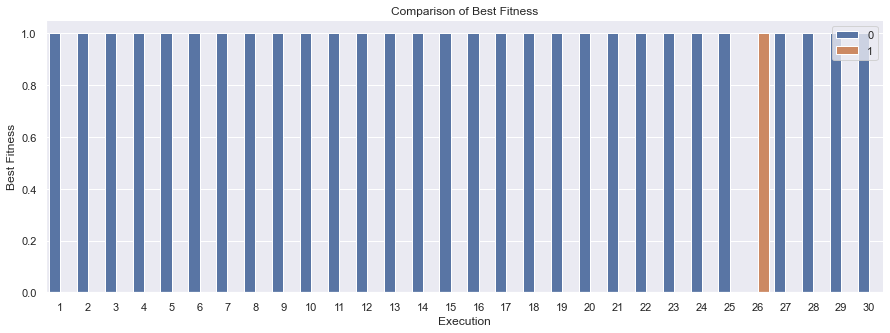

In [740]:
sns.set_theme(style="darkgrid")

f, ax = plt.subplots(figsize=(15, 5))
sns.despine(f)

sns.barplot(x="exec", y="bestf",data=df, hue="optimal")

# Add titles to the plot
plt.title("Comparison of Best Fitness")
plt.xlabel("Execution")
plt.ylabel("Best Fitness")
plt.legend()

# Show plot
plt.show()

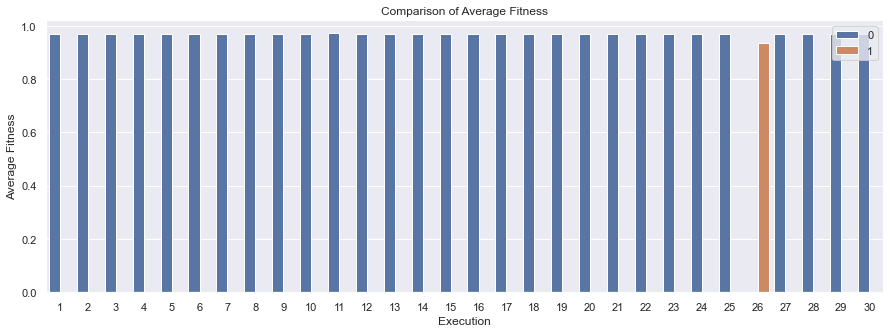

In [741]:

sns.set_theme(style="darkgrid")

f, ax = plt.subplots(figsize=(15, 5))
sns.despine(f)

sns.barplot(x="exec", y="avgf",data=df, hue="optimal")

# Add titles to the plot
plt.title("Comparison of Average Fitness")
plt.xlabel("Execution")
plt.ylabel("Average Fitness")
plt.legend()

# Show plot
plt.show()

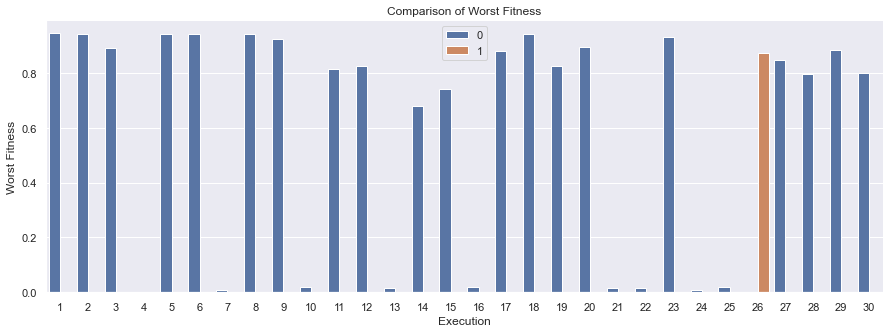

In [742]:
sns.set_theme(style="darkgrid")

f, ax = plt.subplots(figsize=(15, 5))
sns.despine(f)

sns.barplot(x="exec", y="worstf",data=df, hue="optimal")

# Add titles to the plot
plt.title("Comparison of Worst Fitness")
plt.xlabel("Execution")
plt.ylabel("Worst Fitness")
plt.legend()

# Show plot
plt.show()

#### HIST PLOTS

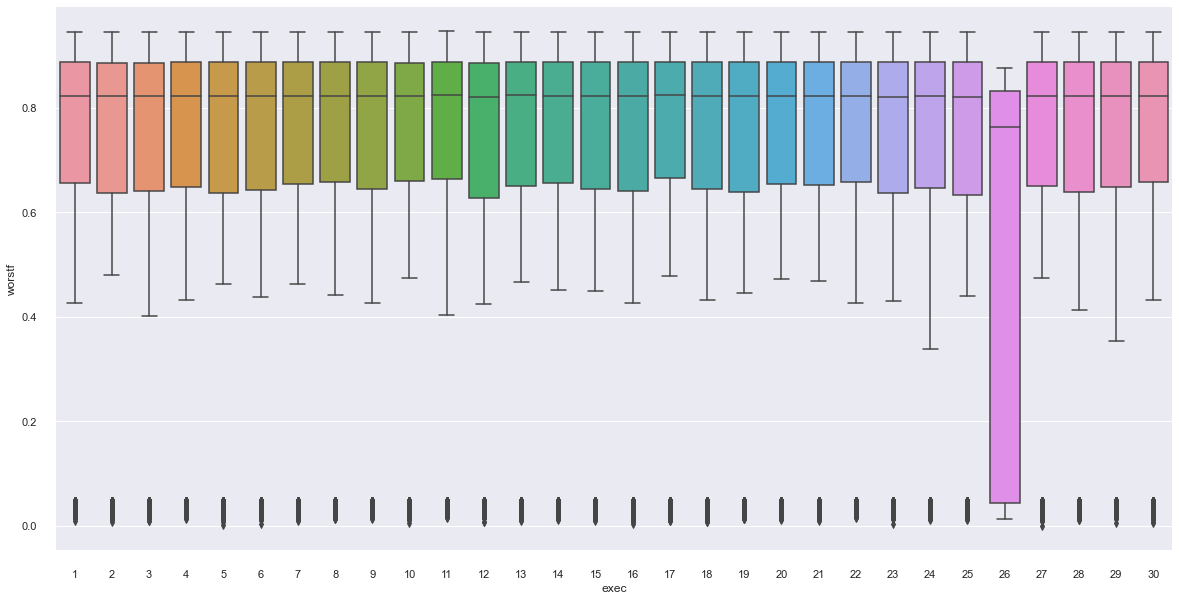

In [743]:
f, ax = plt.subplots(figsize=(20, 10))
sns.despine(f)

# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="exec", y="worstf", data=dff)
sns.despine(offset=10, trim=True)

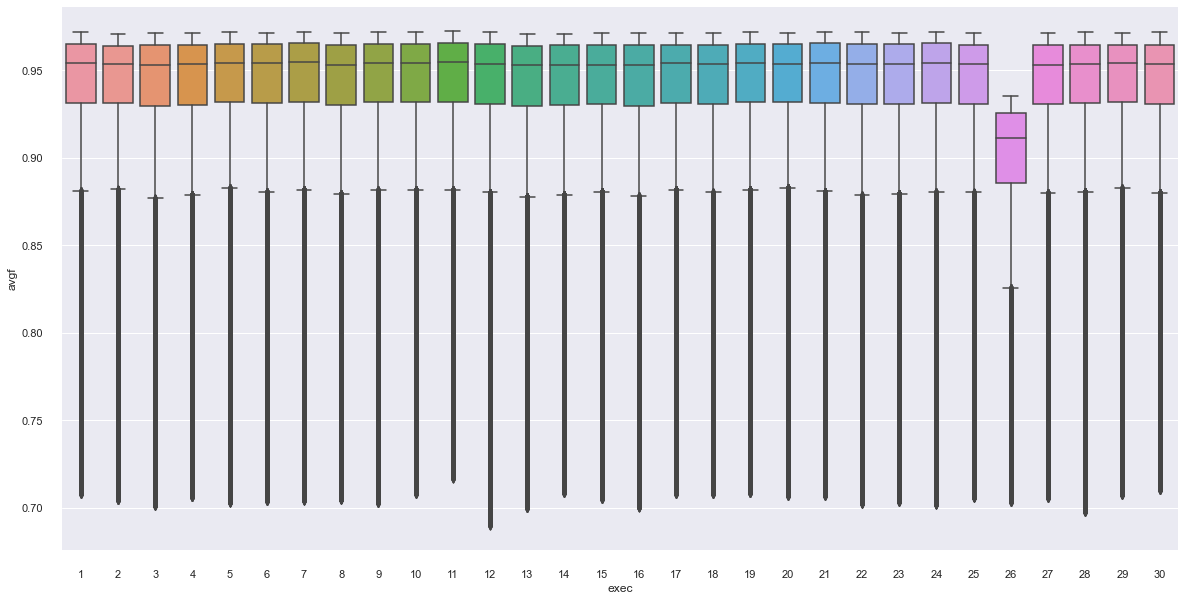

In [744]:
f, ax = plt.subplots(figsize=(20, 10))
sns.despine(f)

# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="exec", y="avgf", data=dff)
sns.despine(offset=10)

In [745]:
f, ax = plt.subplots(figsize=(20, 10))
sns.despine(f)

# Draw a nested boxplot to show bills by day and time
sns.lineplot(x="step", y="bestf", data=dff, hue="exec")
sns.despine(offset=10)